$$\textrm{Joaquin Peñuela Parra}$$
$$\textrm{University of Los Andes}$$
$$\textrm{High Energy Physics Group: Phenomenology of Particles}$$

This code was written to be running in Docker. If you do not have a Docker inside hep-server2 please refer to: https://github.com/Phenomenology-group-uniandes/Tutoriales_Generales

In [1]:
import os, sys
sys.path.append(os.path.join(os.getcwd().split("Leptoquarks_Searches_2023")[0]))

from Uniandes_Framework.delphes_reader import DelphesLoader 
from Uniandes_Framework.delphes_reader import clasificator 
from Uniandes_Framework.delphes_reader import root_analysis 
from Uniandes_Framework.delphes_reader import Quiet 

from ROOT import TH1F 
from ROOT import TCanvas 
from ROOT import THStack 
from ROOT import TLegend 
from ROOT import TLatex 

import pandas as pd
import numpy as np

Welcome to JupyROOT 6.22/06


In [2]:
channels = ['hadronic_non-resonant','hadronic_sLQ','hadronic_dLQ','semileptonic_non-resonant','semileptonic_sLQ','semileptonic_dLQ']

signals = ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']
Masses = ['1250', '1500', '1750', '2000', '2250', '2500']
suffix_by_betard = {'wRHC': '', 'woRHC': '_wo_RHC'}

In [3]:
csv_folder = '/disco4/pheno_csv_files/Leptoquarks_Searches/'
bkgs = ['ttbar', 'stop']

In [4]:
#Testing
csv_folder = '/disco4/pheno_csv_files/Leptoquarks_Searches/'
bkgs = ['ttbar', 'stop','z_jets', 'w_jets', 'ww', 'wz', 'zz']

In [5]:
Datasets_signal = {} 

for key in suffix_by_betard:
    Datasets_signal[key] = {}
    for channel in channels:
        Datasets_signal[key][channel] = {}
        for M in Masses:
            Datasets_signal[key][channel][M] = {}
            for signal in signals:
                Datasets_signal[key][channel][M][signal] = {}
                path_csv = os.path.join(csv_folder, f'{signal}{suffix_by_betard[key]}_{M}', f'{signal}{suffix_by_betard[key]}_{M}_{channel}.csv')
                try: Datasets_signal[key][channel][M][signal] = pd.read_csv(path_csv)
                except: print(f'{path_csv} is empty or the path is wrong.')
    
Datasets_bkg = {} 

for channel in channels:
    Datasets_bkg[channel] = {}
    for bkg in bkgs:
        Datasets_bkg[channel][bkg] = {}
        path_csv = os.path.join(csv_folder, f'{bkg}', f'{bkg}_{channel}.csv')
        try: Datasets_bkg[channel][bkg] = pd.read_csv(path_csv)
        except: print(f'{path_csv} is empty or the path is wrong.')

In [6]:
Datasets_bkg['hadronic_sLQ']['ttbar'].head()

,pT_{#tau_{1}}(GeV),#eta_{#tau_{1}},#phi_{#tau_{1}},Energy_{#tau_{1}}(GeV),#Delta R_{#tau_{1}#tau_{2}},#Delta #eta_{#tau_{1}#tau_{2}},#Delta #phi_{#tau_{1}#tau_{2}},#Delta pT_{#tau_{1}#tau_{2}}(GeV),#Delta #vec{pT}_{#tau_{1}#tau_{2}}(GeV),#Delta #vec{p}_{#tau_{1}#tau_{2}}(GeV),...,#Delta pT_{b_{1}MET}(GeV),#Delta #vec{pT}_{b_{1}MET}(GeV),pT_{MET}(GeV),#phi_{MET},sT(GeV),hT(GeV),mT(GeV),light_jets_multiplicity,Mass_{#tau_{1}#tau_{2}}(GeV),Q_{#tau_{1}}Q_{#tau_{2}}
0,69.688416,-1.285490,-1.021984,136.025710,3.251400,-1.588039,-2.837206,16.783653,121.202823,179.667662,...,40.601942,41.127434,17.979631,-2.407763,199.154383,126.409191,788.354085,2.0,162.038032,-1.0
1,116.981773,0.032178,-1.066242,117.454352,0.996346,0.301092,-0.949763,38.646301,95.691007,98.924390,...,78.812805,133.342852,45.287926,-0.401041,364.705902,357.692371,1653.277001,4.0,93.746690,1.0
2,69.297348,1.420148,-1.412485,152.036142,1.515390,0.524480,1.421734,18.419582,79.645848,115.091339,...,81.559204,214.240639,68.299774,-2.788943,338.333866,124.614031,1060.282919,3.0,84.630132,-1.0
3,120.707558,0.996934,2.327595,186.035337,1.176907,0.915092,-0.740079,65.008640,87.997359,162.592548,...,54.865723,159.932252,82.452194,1.625098,396.176586,172.400795,1224.147504,2.0,101.437742,1.0
4,153.651199,-0.961177,-3.030845,230.505772,2.039926,-1.813252,0.934566,102.779083,130.030660,255.800366,...,-14.433517,72.313723,51.069153,-1.655405,292.228104,207.362762,835.672720,3.0,201.333347,-1.0


In [7]:
Datasets_signal['wRHC']['hadronic_sLQ']['1250']['LQ_LQ'].head()

,pT_{#tau_{1}}(GeV),#eta_{#tau_{1}},#phi_{#tau_{1}},Energy_{#tau_{1}}(GeV),#Delta R_{#tau_{1}#tau_{2}},#Delta #eta_{#tau_{1}#tau_{2}},#Delta #phi_{#tau_{1}#tau_{2}},#Delta pT_{#tau_{1}#tau_{2}}(GeV),#Delta #vec{pT}_{#tau_{1}#tau_{2}}(GeV),#Delta #vec{p}_{#tau_{1}#tau_{2}}(GeV),...,#Delta pT_{b_{1}MET}(GeV),#Delta #vec{pT}_{b_{1}MET}(GeV),pT_{MET}(GeV),#phi_{MET},sT(GeV),hT(GeV),mT(GeV),light_jets_multiplicity,Mass_{#tau_{1}#tau_{2}}(GeV),Q_{#tau_{1}}Q_{#tau_{2}}
0,296.271698,0.743156,2.122128,382.013839,2.757433,2.525423,1.107102,92.852814,274.310872,872.624134,...,612.398895,705.701644,369.332428,-2.915573,1850.754333,1189.676105,2424.110899,3.0,839.202416,-1.0
1,486.107147,-1.266348,0.322388,930.837398,1.889292,-0.920979,-1.649613,303.610382,532.517529,903.207735,...,521.965897,834.193863,210.689499,2.080587,1611.948807,1470.063484,1814.544856,4.0,522.950153,-1.0
2,354.263428,-0.010033,-1.590052,354.295828,2.817376,-2.120824,1.854647,13.386902,556.181852,1496.990007,...,450.461258,472.236356,72.371201,-2.396538,1290.343613,1024.855404,2062.774117,2.0,1043.591961,-1.0
3,322.008820,0.834963,-2.297047,441.541988,2.184420,0.213780,-2.173934,234.811401,378.347423,449.930259,...,-781.072395,1014.517565,904.402588,-1.679626,1436.939018,1289.838535,2084.140439,3.0,299.944847,-1.0
4,637.993835,0.569324,3.126215,744.304696,2.172987,-0.571883,2.096383,317.041626,845.882173,848.606912,...,599.875809,1054.951788,227.538864,1.962592,2013.899582,675.895172,3183.299097,2.0,827.096979,-1.0


In [8]:
bins_dict={
    "#Delta R":[96,0,7],
    "#Delta #eta":[80,-5,5],
    "#Delta #phi":[52,-3.25,3.25],
    "#Delta pT":[120, 0.0, 1500.0],
    "#Delta #vec{pT}":[240, 0.0, 4800.0],
    "#Delta #vec{p}":[240, 0.0, 4800.0],
    "MET(GeV)":[80, 0.0, 1000.0],
    "pT_": [160, 0.0, 2000.0],
    "sT(GeV)": [50, 0.0, 5000.0],
    "mT(GeV)": [200, 0.0, 4000.0],
    "#eta_":[80, -5, 5],
    "#phi_":[128, -3.2, 3.2],
    "Energy_":[80, 0.0, 1000.0]
}

In [9]:
Histograms_signal = {} 

for key in suffix_by_betard:
    Histograms_signal[key] = {}
    for channel in channels:
        Histograms_signal[key][channel] = {}
        for M in Masses:
            Histograms_signal[key][channel][M] = {}
            for signal in signals:                
                Data = Datasets_signal[key][channel][M][signal]
                Histograms_signal[key][channel][M][signal] = root_analysis.make_histograms(Data, hist_bins_dict = bins_dict)
    
Histograms_bkg = {} 

for channel in channels:
    Histograms_bkg[channel] = {}
    for bkg in bkgs:                
        Data = Datasets_bkg[channel][bkg]
        Histograms_bkg[channel][bkg] = root_analysis.make_histograms(Data, hist_bins_dict = bins_dict)

#Delta pT_{#tau_{2}b_{1}}(GeV)  is empty!


In [10]:
#Histograms_bkg['hadronic_sLQ']['ttbar']

In [11]:
Histograms_signal['wRHC']['hadronic_sLQ']['1250']['LQ_LQ'].keys()

dict_keys(['pT_{#tau_{1}}(GeV)', '#eta_{#tau_{1}}', '#phi_{#tau_{1}}', 'Energy_{#tau_{1}}(GeV)', '#Delta R_{#tau_{1}#tau_{2}}', '#Delta #eta_{#tau_{1}#tau_{2}}', '#Delta #phi_{#tau_{1}#tau_{2}}', '#Delta pT_{#tau_{1}#tau_{2}}(GeV)', '#Delta #vec{pT}_{#tau_{1}#tau_{2}}(GeV)', '#Delta #vec{p}_{#tau_{1}#tau_{2}}(GeV)', '#Delta R_{#tau_{1}b_{1}}', '#Delta #eta_{#tau_{1}b_{1}}', '#Delta #phi_{#tau_{1}b_{1}}', '#Delta pT_{#tau_{1}b_{1}}(GeV)', '#Delta #vec{pT}_{#tau_{1}b_{1}}(GeV)', '#Delta #vec{p}_{#tau_{1}b_{1}}(GeV)', '#Delta #phi_{#tau_{1}MET}', '#Delta pT_{#tau_{1}MET}(GeV)', '#Delta #vec{pT}_{#tau_{1}MET}(GeV)', 'pT_{#tau_{2}}(GeV)', '#eta_{#tau_{2}}', '#phi_{#tau_{2}}', 'Energy_{#tau_{2}}(GeV)', '#Delta R_{#tau_{2}b_{1}}', '#Delta #eta_{#tau_{2}b_{1}}', '#Delta #phi_{#tau_{2}b_{1}}', '#Delta pT_{#tau_{2}b_{1}}(GeV)', '#Delta #vec{pT}_{#tau_{2}b_{1}}(GeV)', '#Delta #vec{p}_{#tau_{2}b_{1}}(GeV)', '#Delta #phi_{#tau_{2}MET}', '#Delta pT_{#tau_{2}MET}(GeV)', '#Delta #vec{pT}_{#tau_{2}MET}

In [12]:
def Read_Cutflows_N_Events(channel, signal, Luminosity = 137*1000):
    
    #[Luminosity]: 1/pb
    cutflows_path = os.path.join('Cutflows', f'{channel}.csv')
    cutflows_file = pd.read_csv(cutflows_path, index_col= 0)
    cutflows_file = cutflows_file.dropna()
    
    Efficience = cutflows_file[signal]['DeltaR > 0.3']/cutflows_file[signal]['All']
    XS = cutflows_file[signal]['XS']
    return Efficience*XS*Luminosity

In [13]:
for key in suffix_by_betard:
    for channel in channels:
        for M in Masses:
            for signal in signals:                
                for histo_key in Histograms_signal[key][channel][M][signal]:
                    
                    histo = Histograms_signal[key][channel][M][signal][histo_key]
                    N_events = Read_Cutflows_N_Events(channel, f'{signal}{suffix_by_betard[key]}_{M}')
                    try: histo.Scale(N_events/histo.Integral())
                    except: pass
    
for channel in channels:
    for bkg in bkgs: 
        
        N_events = Read_Cutflows_N_Events(channel, bkg)
        
        for histo_key in Histograms_bkg[channel][bkg]:

            histo = Histograms_bkg[channel][bkg][histo_key]
            try: histo.Scale(N_events/histo.Integral())
            except: pass

/tmp/ipykernel_125379/1618587751.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  try: histo.Scale(N_events/histo.Integral())


In [14]:
for channel in channels:
    Histograms_bkg[channel]['w_jets'] = {}
    N_events = Read_Cutflows_N_Events(channel, 'w_jets')
    
    for histo_key in Histograms_bkg[channel]['z_jets']:
                
        h_w_jets = Histograms_bkg[channel]['z_jets'][histo_key].Clone('')
        h_w_jets.SetDirectory(0)
        h_w_jets.SetNameTitle('w_jets', 'w_jets')
        try: h_w_jets.Scale(N_events/h_w_jets.Integral())
        except: pass
    
        Histograms_bkg[channel]['w_jets'][histo_key] = h_w_jets

In [15]:
suffix_by_betard = {'wRHC': '', 'woRHC': '_wo_RHC'}
header_by_betard = {'wRHC': '#beta_{R} = -1', 'woRHC': '#beta_{R} = 0'}

def Overlap_Histos(Signal_Histogram_Dict, 
                   Bkg_Histogram_Dict, 
                   channel,
                   Signal_Directory, 
                   Bkg_Directory, 
                   Title_Plot,
                   Kinematic_variable,
                   Mass, 
                   betard_key = 'wRHC',
                   Signal_to_ignore = '', 
                   alpha_bkg = 0.05, 
                   alpha_signal = 0.05, 
                   Stack = False, 
                   Log_Y = False, 
                   Log_X = True, 
                   Grid = False,
                   Path_folder_to_save = ''):
    
    #if Stack is False -> Histograms will be normalized by A.U
    #if Stack is True -> Histograms will be normalized by number of physical events
    
    #canvas = TCanvas(Title_Plot, " ", 0, 0, 1280, 720)
    canvas = TCanvas(Title_Plot, " ", 0, 0, 800, 600)
    
    
    #legend = TLegend(0.9,.4,1,.89) #Legend outside the graph
    legend = TLegend(0.48,.75,0.87,.89)
    legend.SetNColumns(4) 
    legend.SetHeader('Mass_{U}' + f'= {int(Mass)/1000} TeV' + ', g_{U} = 1.8' + ', ' + header_by_betard[betard_key],"C")
    legend.SetLineWidth(1)
    #legend.SetFillStyle(0) #Transparent legend window
    
    x_axis = Kinematic_variable.replace('(GeV)', '[GeV]')
    
    Histos = THStack('hist', Title_Plot)
    colors = [94,6,3,209,1,2,226,4] #https://root-forum.cern.ch/t/what-is-your-best-way-to-increment-colors/13809
    
    Dict_Hist = {}
        
    for i in range(len(Bkg_Directory.keys())):
            bkg_key = list(Bkg_Directory.keys())[i]
            bkg_list = Bkg_Directory[bkg_key]
            
            histo_list = []
            for bkg in bkg_list:
                if (bkg != Signal_to_ignore):
                    if (Bkg_Histogram_Dict[channel][bkg][Kinematic_variable] != {}):
                        h = Bkg_Histogram_Dict[channel][bkg][Kinematic_variable]
                        h.Scale(Read_Cutflows_N_Events(channel, bkg)/h.Integral())
                        histo_list.append(h)
                
            histo_Nevents = root_analysis.sum_histos(histo_list)
            histo_normalized = root_analysis.sum_histos(histo_list)
            histo_normalized.Scale(1.0/histo_normalized.Integral())
            
            if (Stack): 
                histo = histo_Nevents
                histo.SetTitle(f'{bkg_key}; {x_axis}; Events')
            else: 
                histo = histo_normalized
                histo.SetTitle(f'{bkg_key}; {x_axis}; A.U')
            
            color = len(Signal_Directory.keys()) + i + 1
            if color == 7: color = 3
            
            color = colors[i]
            
            histo.SetLineColor(color)
            histo.SetFillColorAlpha(color, alpha_bkg)
            histo.SetLineWidth(2)
            histo.SetDirectory(0)  
            histo.Rebin(2)
            
            Histos.Add(histo)
            Dict_Hist[bkg_key] = histo
            legend.AddEntry(histo,bkg_key)
    
    Signal_Histogram_Dict = Signal_Histogram_Dict[betard_key]
    for j in range(len(Signal_Directory.keys())):
            signal_key = list(Signal_Directory.keys())[j]
            signal_list = Signal_Directory[signal_key]
            
            histo_list = []
            for signal in signal_list:
                if (signal != Signal_to_ignore):
                    if (Signal_Histogram_Dict[channel][Mass][signal][Kinematic_variable] != {}):
                        h = Signal_Histogram_Dict[channel][Mass][signal][Kinematic_variable]
                        h.Scale(Read_Cutflows_N_Events(channel, f'{signal}{suffix_by_betard[betard_key]}_{Mass}')/h.Integral())
                        histo_list.append(h)
                
            histo_Nevents = root_analysis.sum_histos(histo_list)
            
            histo_normalized = root_analysis.sum_histos(histo_list)
            histo_normalized.Scale(1.0/histo_normalized.Integral())
            
            if (Stack): 
                histo = histo_Nevents
                histo.SetTitle(f'{signal_key}; {x_axis}; Events')
            else: 
                histo = histo_normalized
                histo.SetTitle(f'{signal_key}; {x_axis}; A.U')
            
            color = j + 1
            if color == 3: color = 7
            
            color = colors[i + j + 1]
            
            histo.SetLineColor(color)
            histo.SetFillColorAlpha(color, alpha_signal)
            histo.SetLineStyle(2)
            histo.SetLineWidth(2)
            histo.SetDirectory(0) 
            histo.Rebin(2)
            
            Histos.Add(histo)
            Dict_Hist[signal_key] = histo
            legend.AddEntry(histo,signal_key)
            
    if Log_Y: canvas.SetLogy()
    if Log_X: canvas.SetLogx()
    if Grid: canvas.SetGrid()
        
    if Stack:
        Histos.Draw("hist")
        Histos.SetTitle(f'{Title_Plot}; {x_axis}; Events')  
        
    else: 
        Histos.Draw("histnostack")
        Histos.SetTitle(f'{Title_Plot}; {x_axis}; A.U')  
    
    latex = TLatex()
    latex.SetNDC()
    latex.SetTextSize(0.04)
    latex.DrawLatex(0.76,0.91,'#sqrt{s} = 13 TeV')
    #latex.DrawLatex(0.61,0.91,'#sqrt{s} = 13 TeV, L = 137 fb^{-1}')

    canvas.Draw()
    legend.Draw('same')
    
    #Histos.GetXaxis().SetLimits(0.0, float(Mass)*3)          
    
    if Path_folder_to_save != '':
        try: os.mkdir(Path_folder_to_save)
        except: pass

        with root_analysis.Quiet():
            root_analysis.Save_Histograms_png(Path_folder_to_save, Dict_Hist, Log_Y = True)
            root_analysis.Write_txt_file_with_high_per_bin(os.path.join(Path_folder_to_save, 'high_per_bin'), Dict_Hist)
            canvas.SaveAs(os.path.join(Path_folder_to_save, f'THStack_{channel}.png')) 
            
    Dict_Hist['THStack'] = Histos     
    
    return Histos, canvas, legend, Dict_Hist

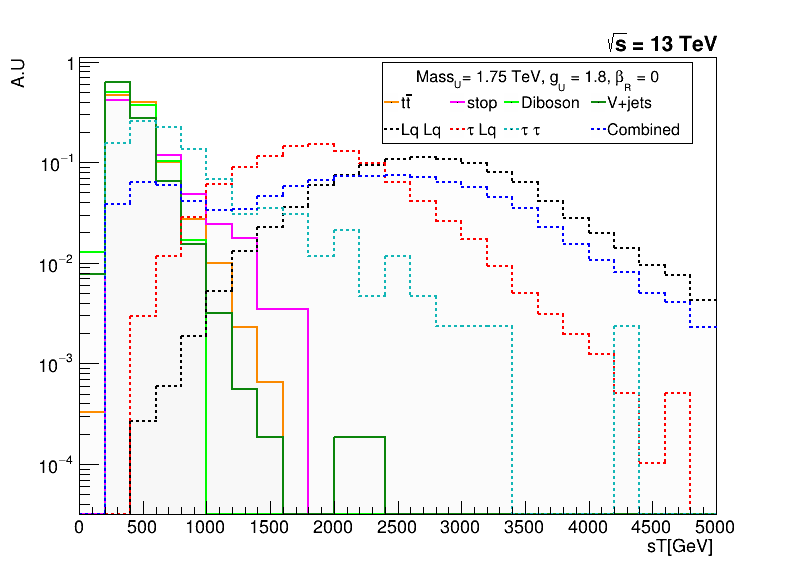

In [16]:
Histos, canvas, legend, Dict_Hist = Overlap_Histos(Signal_Histogram_Dict = Histograms_signal, 
                                                   Bkg_Histogram_Dict = Histograms_bkg, 
                                                   channel = "hadronic_dLQ",
                                                   Signal_Directory = {'Lq Lq': ['LQ_LQ'], '#tau Lq': ['Tau_LQ'], '#tau #tau': ['Tau_Tau'], 'Combined':  ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']}, 
                                                   Bkg_Directory = {'t#bar{t}': ['ttbar'], 'stop': ['stop'], 'Diboson': ['ww', 'wz', 'zz'], 'V+jets': ['w_jets', 'z_jets']}, 
                                                   Title_Plot = '',
                                                   Kinematic_variable = 'sT(GeV)',
                                                   Mass = '1750', 
                                                   betard_key = 'woRHC',
                                                   Signal_to_ignore = '', 
                                                   alpha_bkg = 0.0, 
                                                   alpha_signal = 0.00, 
                                                   Stack = False, 
                                                   Log_Y = True, 
                                                   Log_X = False, 
                                                   Grid = False,
                                                   Path_folder_to_save = '')

Info in <TCanvas::Print>: pdf file ST_Histograms/sT(GeV)_hadronic_non-resonant_wRHC.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: #tau_{h} #tau_{h}
Info in <TCanvas::Print>: pdf file ST_Histograms/sT(GeV)_hadronic_non-resonant_woRHC.pdf has been created
Info in <TCanvas::Print>: pdf file ST_Histograms/sT(GeV)_hadronic_sLQ_wRHC.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: b #tau_{h} #tau_{h}
Info in <TCanvas::Print>: pdf file ST_Histograms/sT(GeV)_hadronic_sLQ_woRHC.pdf has been created
Info in <TCanvas::Print>: pdf file ST_Histograms/sT(GeV)_hadronic_dLQ_wRHC.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: b b #tau_{h} #tau_{h}
Info in <TCanvas::Print>: pdf file ST_Histograms/sT(GeV)_hadronic_dLQ_woRHC.pdf has been created
Info in <TCanvas::Print>: pdf file ST_Histograms/sT(GeV)_semileptonic_non-resonant_wRHC.pdf has been created
Warning in <TCanvas::Constructor>

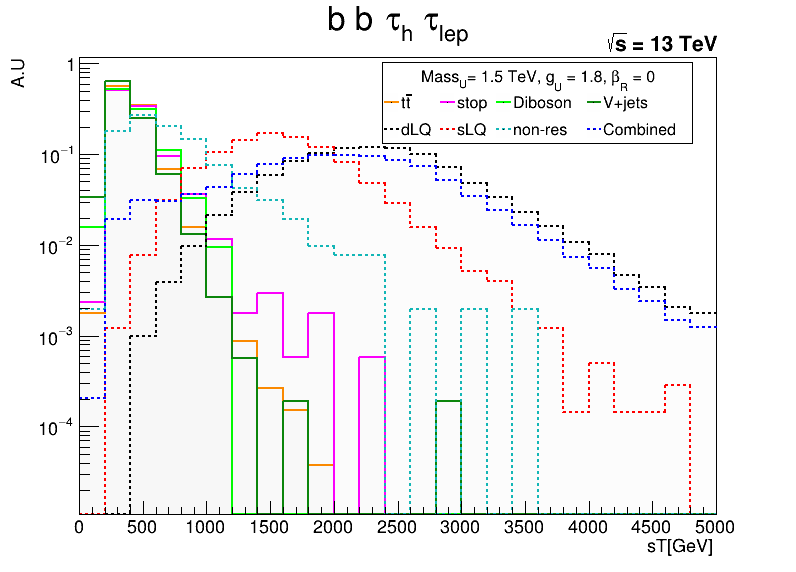

In [17]:
try: os.mkdir('ST_Histograms')
except: pass

for process in channels:
    
    if (process == 'hadronic_non-resonant'): titulo = '#tau_{h} #tau_{h}'
    if (process == 'hadronic_sLQ'): titulo = 'b #tau_{h} #tau_{h}'
    if (process == 'hadronic_dLQ'): titulo = 'b b #tau_{h} #tau_{h}'
    if (process == 'semileptonic_non-resonant'): titulo = '#tau_{h} #tau_{lep}'
    if (process == 'semileptonic_sLQ'): titulo = 'b #tau_{h} #tau_{lep}'
    if (process == 'semileptonic_dLQ'): titulo = 'b b #tau_{h} #tau_{lep}'   
                    
    Histos, canvas, legend, Dict_Hist = Overlap_Histos(Signal_Histogram_Dict = Histograms_signal, 
                                                   Bkg_Histogram_Dict = Histograms_bkg, 
                                                   channel = process,
                                                   Signal_Directory = {'dLQ': ['LQ_LQ'], 'sLQ': ['Tau_LQ'], 'non-res': ['Tau_Tau'], 'Combined':  ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']}, 
                                                   Bkg_Directory = {'t#bar{t}': ['ttbar'], 'stop': ['stop'], 'Diboson': ['ww', 'wz', 'zz'], 'V+jets': ['w_jets', 'z_jets']}, 
                                                   Title_Plot = titulo,
                                                   Kinematic_variable = 'sT(GeV)',
                                                   Mass = '1500', 
                                                   betard_key = 'wRHC',
                                                   Signal_to_ignore = '', 
                                                   alpha_bkg = 0.0, 
                                                   alpha_signal = 0.00, 
                                                   Stack = False, 
                                                   Log_Y = True, 
                                                   Log_X = False, 
                                                   Grid = False,
                                                   Path_folder_to_save = '')
    
    canvas.SaveAs(os.path.join('ST_Histograms', f'sT(GeV)_{process}_wRHC.pdf')) 
    
    Histos, canvas, legend, Dict_Hist = Overlap_Histos(Signal_Histogram_Dict = Histograms_signal, 
                                                   Bkg_Histogram_Dict = Histograms_bkg, 
                                                   channel = process,
                                                   Signal_Directory = {'dLQ': ['LQ_LQ'], 'sLQ': ['Tau_LQ'], 'non-res': ['Tau_Tau'], 'Combined':  ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']}, 
                                                   Bkg_Directory = {'t#bar{t}': ['ttbar'], 'stop': ['stop'], 'Diboson': ['ww', 'wz', 'zz'], 'V+jets': ['w_jets', 'z_jets']}, 
                                                   Title_Plot = titulo,
                                                   Kinematic_variable = 'sT(GeV)',
                                                   Mass = '1500', 
                                                   betard_key = 'woRHC',
                                                   Signal_to_ignore = '', 
                                                   alpha_bkg = 0.0, 
                                                   alpha_signal = 0.00, 
                                                   Stack = False, 
                                                   Log_Y = True, 
                                                   Log_X = False, 
                                                   Grid = False,
                                                   Path_folder_to_save = '')
    
    canvas.SaveAs(os.path.join('ST_Histograms', f'sT(GeV)_{process}_woRHC.pdf')) 